# Workshop Hands On KI
# Regression
**In dieser Aufgabe implementieren wir ein simples neuronales Netzwerk zur Vorhersage (Regression) der Eigenschaft eines Bauteils. Der folgende Code ist ein vollständiges Beispiel für ein einfaches Regressionsproblem mit neuronalen Netzen, von der Datenvorbereitung bis zur Modellbewertung.**

**Bibliotheken importieren:** Der folgende Code importiert die erforderlichen Bibliotheken für das Erstellen, Trainieren und Evaluieren eines KI-Modells sowie zugehöriger graphischer Ausgaben.

Wichtige Bibliotheken sind beispielsweise

1. pandas:
   - Eine Bibliothek für Datenmanipulation und -analyse. Mit ihr kann man Datenstrukturen wie DataFrames erstellen und bearbeiten, was besonders nützlich für das Handling großer Datenmengen ist.

2. numpy:
   - Eine Bibliothek für die effiziente Arbeit mit großen, mehrdimensionalen Arrays und Matrizen.

3. seaborn und matplotlib:
   - Beides sind Visualisierungsbibliotheken. Seaborn baut auf Matplotlib auf und ermöglicht die Erstellung schön gestalteter Grafiken. Beide werden oft verwendet, um Daten zu explorieren und die Ergebnisse der Datenanalyse visuell darzustellen.

4. sklearn:
   - Eine Bibliothek für maschinelles Lernen. Beispielsweise wird `train_test_split` genutzt, um Daten in Trainings- und Testsets aufzuteilen.

5. tensorflow und tensorflow.keras:
   - TensorFlow ist eine Open-Source-Plattform für maschinelles Lernen. Keras ist eine Schnittstelle für TensorFlow, die das Erstellen und Trainieren von Modellen vereinfacht. `Sequential` ermöglicht die einfache Erstellung eines linearen Stapels von Schichten für ein neuronales Netzwerk. `Dense` steht für vollständig verbundene Neuronenschichten.

In [1]:
# Profiling
!pip install ydata_profiling > /dev/null 2>&1
from ydata_profiling import ProfileReport

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

# XGBoost
from xgboost import XGBRegressor

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

Datensatz:
- TrendAuto2030plus_Entwicklungssystematik_HandsOnKI_Regression_DATEN.xlsx

In diesem Datensatz geht es darum, die Druckfestigkeit von Beton anhand der Anteile seiner Bestandteile (Zement, Asche, Wasser, künstl. Zusatzmittel, ...) mithilfe eines KI-Modells vorherzusagen. Das Ziel ist dabei, dass die vorhergesagte Druckfestigkeiten möglichst nah an den tatsächlichen Werten liegen.

In [2]:
# Pfad der Daten in Excel-Datei definieren
data_path = 'https://drive.google.com/uc?export=download&id=1qcd2_D_yRwXsMqfMdeTOTQE4OzdiSeK6'

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**1. Lesen Sie die Daten der spezifizierten Excel-Datei ein.**

**2. Geben Sie den Kopf der Datei aus.**

**3. Geben Sie die Anzahl an Spalten und Zeilen der Datei aus.**

**4. Geben Sie die allgemeinen Informationen der Datei aus.**

**5. Geben Sie die statistischen Daten der Datei aus.**

Sie kommen nicht weiter? Lassen Sie sich durch Vibe Coding helfen:
https://cloud.google.com/discover/what-is-vibe-coding?hl=de


In [3]:
# Daten einlesen
data = pd.read_excel ('https://drive.google.com/uc?export=download&id=1qcd2_D_yRwXsMqfMdeTOTQE4OzdiSeK6')

# Daten ausgeben
print("Kopf der Datei:")
print(data.head())
print("\n")
print("Anzahl Zeilen & Spalten:")
print(data.shape)
print("\n")

# Daten rudimentär analysieren
print("Infos über die Datei:")
print(data.info())
print("\n")
print("Statistische Daten:")
print(data.describe().T)

Kopf der Datei:
   Cement [kg/m3]  Slag [kg/m3]  FlyAsh [kg/m3]  Water [kg/m3]  \
0           540.0           0.0             0.0          162.0   
1           540.0           0.0             0.0          162.0   
2           332.5         142.5             0.0          228.0   
3           332.5         142.5             0.0          228.0   
4           198.6         132.4             0.0          192.0   

   Superplasticizer [kg/m3]  CoarseAggregate [kg/m3]  FineAggregate [kg/m3]  \
0                       2.5                   1040.0                  676.0   
1                       2.5                   1055.0                  676.0   
2                       0.0                    932.0                  594.0   
3                       0.0                    932.0                  594.0   
4                       0.0                    978.4                  825.5   

   Age [days]  CompressiveStrength [MPa]  
0          28                      79.99  
1          28             

### Datenanalyse

**Explorative Datenanalyse (EDA):** Der folgende Code analysiert beispielhaft mithilfe des Profile Reports die Verteilung der Merkmale des Datensatzes, um Muster und Beziehungen zu erkennen. Der Profile Report enthält u.a.
 - Eigenschaften der einzelnen Variablen,
 - Interaktionsgrafik,
 - visualisiert Datendichte zwischen zwei Variablen,
 - Korrelationsgrafik,
 - lineare Zusammenhänge zwischen Variablen,
 - schnelle Überprüfung fehlender Werte pro Variable.

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.


**Aufgabe:**

**1. Führen Sie den Profile Report für die Daten aus.**

**2. Analysieren Sie die Ergebnisse des Profile Reports. Was fällt Ihnen auf?**

In [4]:
# Daten detailliert analysieren und Analyseergebnisse visualisieren
profile_report = ProfileReport(data, title = "Datenanalyse", explorative = True)
profile_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 84.25it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Datenvorbereitung

**Aufteilung in Eingangs- und Ausgangsvariablen:** Der folgende Code definiert die Eingangs- (`X`) und Ausgangsvariablen (`y`). Dabei enthält `X` alle Spalten außer `CompressiveStrength [MPa]` sowie `y` die Spalte `CompressiveStrength [MPa]`.

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**Definieren Sie die Ein- & Ausgangsvariablen.**

In [5]:
# Ein- und Ausgangsvariablen definieren

# Eingangsvariablen (alle Spalten außer CompressiveStrength)
X = data.drop(columns=['CompressiveStrength [MPa]'])

# Ausgangsvariable (nur CompressiveStrength)
y = data['CompressiveStrength [MPa]']

In [6]:
# Spaltennamen vereinfachen (gewisse Zeichen nicht lesbar für XGBoost)
X.columns = [col.replace('[', '').replace(']', '').replace('<', '').replace('>', '').replace('/', '_').replace(' ', '_') for col in X.columns]

**Standardisierung numerischer Werte:** Der folgende Code standardisiert numerische Werte mithilfe des Standardscalers, sodass der Mittelwert der Daten 0 und die Standardabweichung 1 beträgt, sodass alle Werte in einer vergleichbaren Größenordnung vorliegen. Diese Standardisierung ist notwendig für KI-Modelle, die empfindlich auf Skalen oder Distanzen reagieren, wie logistische Regression, k-Means und neuronale Netze, jedoch nicht erforderlich für skalenunabhängige KI-Modelle wie Random Forest und XGBoost.

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**Skalieren Sie die Eingangsvariablen.**

In [7]:
# Skalierung der Eingangsdaten
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Aufteilung in Trainings- und Testdaten:** Der folgende Code teilt den Datensatz in Trainings- (z.B. 80%) und Testdaten (z.B. 20%) mittels der Funktion `train_test_split` auf.

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**Teilen Sie den Datensatz in 80 % Trainings- sowie 20 % Testdaten auf.**

In [8]:
# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

# PAUSE

### Modellauswahl und Training

### Neuronales Netz

**Modell definieren und zusammenstellen:** Der folgende Code erstellt mittels der Funktion `Sequential` ein sequenzielles Modell eines neuronalen Netzes. Dies ist ein Stapel von Schichten, wo jede Schicht genau eine Eingabe und eine Ausgabe hat. Mit der Funktion `Dense` werden anschließend dem Modell Schichten hinzugefügt. Eine Schicht des neuronalen Netzes benötigt dabei Spezifikationen wie die Anzahl der Neuronen und die Aktivierungsfunktion. Außerdem wird hier eine Verlustfunktion (`loss = Huber()`), ein Optimierer (`optimizer = Adam(learning_rate = 0.0001)`) mit einer Lernrate angegeben, mit dem das Modell mittels der Funktion `model.compile` kompiliert wird.

*Die Anzahl Schichten, Neuronen pro Schicht sowie die Aktivierungsfunktion pro Schicht sind klassische Designparameter der Architektur eines neuronalen Netzwerks, welche zum Finetuning des Modells variiert werden können.*

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**1. Bauen Sie ein neuronales Netz mit einer Eingabeschicht, beliebig vielen versteckten Schichten sowie einer Ausgabeschicht auf und wählen Sie die Anzahl an Neuronen entsprechend. Wählen Sie als Aktivierungsfunktion der Eingabeschicht sowie der versteckten Schichten `relu` sowie der Ausgabeschicht `linear`.**

**2. Begründen Sie warum die Aktivierungsfunktion der Ausgabeschicht `linear` sein sollte.**

In [11]:
# Neuronales Netz erstellen
model_nn = Sequential()
model_nn.add(Input(shape = (X_train.shape[1], )))
model_nn.add(Dense(16, activation = 'relu'))
model_nn.add(Dense(32, activation = 'relu'))
model_nn.add(Dense(1, activation = 'linear'))

# Modell kompilieren
model_nn.compile(loss = 'mse', optimizer= 'adam', metrics = ['mae'])

**Modell trainieren:** Der folgende Code trainiert das Modell des neuronalen Netzes mit den Trainingsdaten, z.B. über 50 Epochen (`epochs`) mit einer Batch-Größe von z.B. 32 (`batch_size`) mittels der Funktion `model.fit`, wobei z.B. 20 % der Daten für die Validierung reserviert werden (`validation_split`).

*Die Anzahl Epochen sowie die Batch-Größe sind klassische Designparameter beim Training eines neuronalen Netzwerks, welche zum Finetuning des Modells variiert werden können.*

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**Trainieren Sie das Modell. Definieren Sie hierfür passende Parameter.**

In [12]:
# Modell trainieren
history = model_nn.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1576.9142 - mae: 35.6930 - val_loss: 1493.4092 - val_mae: 35.4747
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1461.6854 - mae: 34.2011 - val_loss: 1443.6117 - val_mae: 34.7955
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1446.5510 - mae: 34.0436 - val_loss: 1375.0149 - val_mae: 33.8385
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1383.2158 - mae: 33.1058 - val_loss: 1277.7311 - val_mae: 32.4350
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1241.4127 - mae: 31.1320 - val_loss: 1142.7676 - val_mae: 30.3872
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1162.8062 - mae: 29.5369 - val_loss: 966.4155 - val_mae: 27.5161
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 940.8040 - mae: 26.1380 - val_loss: 772.2831 - val_mae: 24.0253
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 728.5914 - mae: 22.4018 - val_loss: 583.2533 - val_mae: 20.3109
Epoch 9/50


### Modellanalyse

**Modell evaluieren:** **Modell evaluieren:** Der folgende Code bewertet das trainierte Modell. Dazu werden die Testdaten (`X_test`) verwendet, um Vorhersagen des Modells für den Testdatensatz werden zu berechnen (`y_pred`). Anschließend werden die Vorhersagen mit den tatsächlichen Werten verglichen und z.B. der mittlere absolute prozentuale Fehler (Mean Absolute Percentage Error) mittels der Funktion `mean_absolute_percentage_error` als eine Metrik zur Bewertung des Modells berechnet.

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**1. Berechnen Sie den mittleren absoluten prozentualen Fehler.**

**2. Geben Sie den mittleren absoluten prozentualen Fehler aus.**

In [14]:
# Vorhersagen treffen
y_pred_nn = model_nn.predict(X_test)

# MAPE (Mean Absolute Percentage Error) berechnen
mape = mean_absolute_percentage_error(y_test, y_pred_nn)

# Präzision der Vorhersagen ausgeben
print(f"Mittlerer absoluter prozentualer Fehler (MAPE): {mape:.2%}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Mittlerer absoluter prozentualer Fehler (MAPE): 33.87%


Der folgende Code erlaubt die Bewertung des Training des Modells, indem die Trainings- und Validierungsgenauigkeit über die Epochen hinweg in Diagrammen dargestellt werden.

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**Visualisieren Sie den Trainingsverlust sowie den Validierungsverlust über die Epochen hinweng in einem Diagramm.**

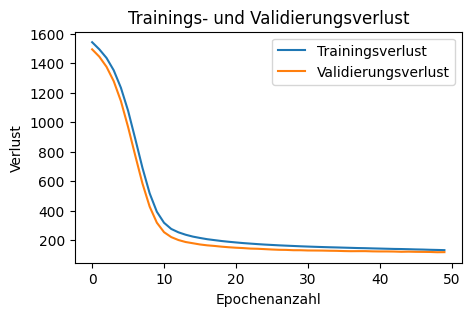

In [15]:
# Verlust des Modells visualisieren
plt.figure(figsize = (5, 3))
plt.plot(history.history['loss'], label = 'Trainingsverlust')
plt.plot(history.history['val_loss'], label = 'Validierungsverlust')
plt.title('Trainings- und Validierungsverlust')
plt.xlabel('Epochenanzahl')
plt.ylabel('Verlust')
plt.legend()
plt.show()

Der folgende Code erstellt eine Visualisierung, die die tatsächlichen Werte (Ist-Werte) mit den vorhergesagten Werten des Modells vergleicht

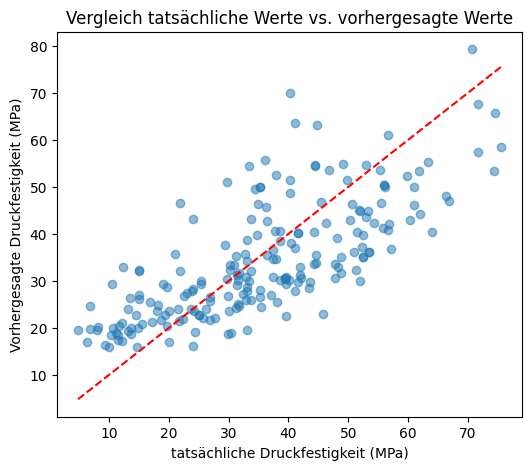

In [16]:
# Vergleich Ist-Werte und Vorhersagen plotten
plt.figure(figsize = (6, 5))
plt.scatter(y_test, y_pred_nn, alpha = 0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Vergleich tatsächliche Werte vs. vorhergesagte Werte')
plt.xlabel('tatsächliche Druckfestigkeit (MPa)')
plt.ylabel('Vorhergesagte Druckfestigkeit (MPa)')
plt.show()

**Aufgabe:**

**1. Evaluieren Sie die Analyseergebnisse**

**2. Optimieren Sie die Designparameter und trainieren Sie das Modell entsprechend neu, bis Sie mit den Ergebnissen zufrieden sind.**

**Feinabstimmung und Vorhersagen:** Basierend auf der vorherigen Auswertung ist ersichtlich, dass das Modell des neuronalen Netzwerks noch Optimierungspotenzial für diese Regressionsaufgabe zeigt. Daher wird in einem nächsten Schritt das Modell weiter angepasst, um die Leistung zu verbessern. Ist ein optimales Modell gefunden, kann das Modell realisiert werden, um beispielsweise wie in dieser Anwendung Vorhersagen zu tätigen.

### XGBoost

XGBoost ist ein leistungsstarkes maschinelles Lernmodell, das auf dem Prinzip des Gradient Boosting basiert. Dabei handelt es sich um ein Ensemble-Modell, das durch die sequentielle Kombination von Entscheidungsbäumen arbeitet, um genauere Vorhersagen zu erlangen. Anders als beim Random Forest, bei dem die Bäume parallel trainiert werden, erhält bei XGBoost jeder Baum nacheinander neue Merkmale. Jeder neue Baum zielt darauf ab, die Fehler der vorhergehenden Bäume zu korrigieren, was die Modellleistung sukzessive verbessert.

Eine besondere Stärke von XGBoost ist seine Fähigkeit, gewichtete Entscheidungsbäume zu verwenden und Regularisierungstechniken einzusetzen, um Overfitting zu vermeiden.

*Zu den wichtigsten Hyperparametern zählen die Anzahl der zu verwendenden Entscheidungsbäume (`n_estimators`) und die Lernrate (`learning_rate`), welche den Einfluss jedes neu hinzugefügten Baums bestimmt.*

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**1. Definieren Sie die Anzahl der Entscheidungsbäume sowie die Lernrate.**

**2. Implementieren Sie die Funktion, mit der das Modell trainiert wird.**

In [17]:
# Anzahl der Bäume (n_estimators) und Lernrate (learning_rate) definieren
model_xgb = XGBRegressor(
    n_estimators=300,      # Anzahl der Entscheidungsbäume
    learning_rate=0.1,     # Lernrate
    max_depth=5,           # Baumtiefe (optional)
    random_state=42
)

# Modell trainieren
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**1. Berechnen Sie den mittleren absoluten prozentualen Fehler.**

**2. Geben Sie den mittleren absoluten prozentualen Fehler aus.**

In [18]:
# Vorhersagen treffen
y_pred_xgb = model_xgb.predict(X_test)

# MAPE berechnen
mape = mean_absolute_percentage_error(y_test, y_pred_xgb)

# Ergebnis ausgeben
print(f"MAPE: {mape * 100:.2f} %")
print(f"Präzision der Vorhersage: {100 - mape * 100:.2f} %")

MAPE: 10.01 %
Präzision der Vorhersage: 89.99 %


### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**Stellen Sie die Vorhersage über den tatsächliche Werten in einem Diagramm dar.**

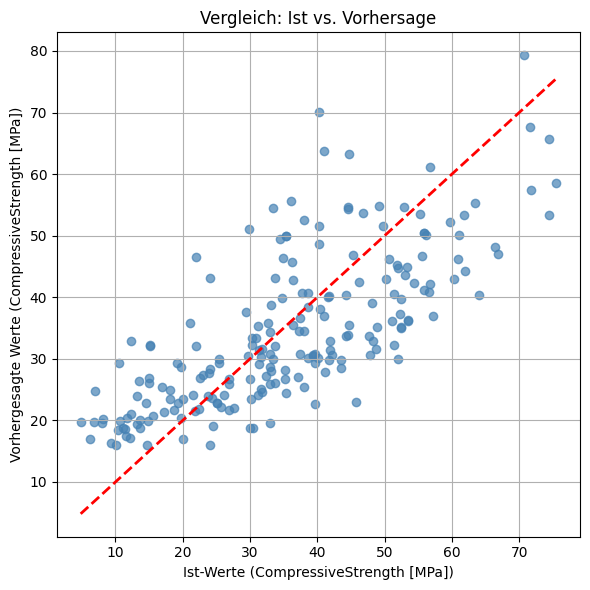

In [19]:
# Vergleich Ist-Werte und Vorhersagen plotten
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='steelblue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Ist-Werte (CompressiveStrength [MPa])')
plt.ylabel('Vorhergesagte Werte (CompressiveStrength [MPa])')
plt.title('Vergleich: Ist vs. Vorhersage')
plt.grid(True)
plt.tight_layout()
plt.show()

**Aufgabe:**

**1. Optimieren Sie die verschiedenen KI-Modelle.**

**2. Welches Modell liefert die besten Ergebnisse?**

### Vergleich

**Modellvergleich:** Der folgende Code vergleicht die verschiedener Modelle  Neuronale Netz (NN) und XGBoost (XGB). Hierbei wird ein Streudiagramm wird verwendet, um die Modellgüte zu veranschaulichen. In diesem Diagramm repräsentieren blaue Punkte die Vorhersagen der Modelle, während eine rote Linie die idealen Vorhersagen darstellt. Je näher die blauen Punkte an der roten Linie liegen, desto genauer sind die Vorhersagen des Modells.

Das primäre Ziel dieser grafischen Analyse ist es, die unterschiedlichen Modelle hinsichtlich ihrer Vorhersagegenauigkeit zu vergleichen. Eine visuelle Einschätzung ermöglicht die Identifikation systematischer Abweichungen, wie etwa Über- oder Unterschätzungen in speziellen Wertebereichen.

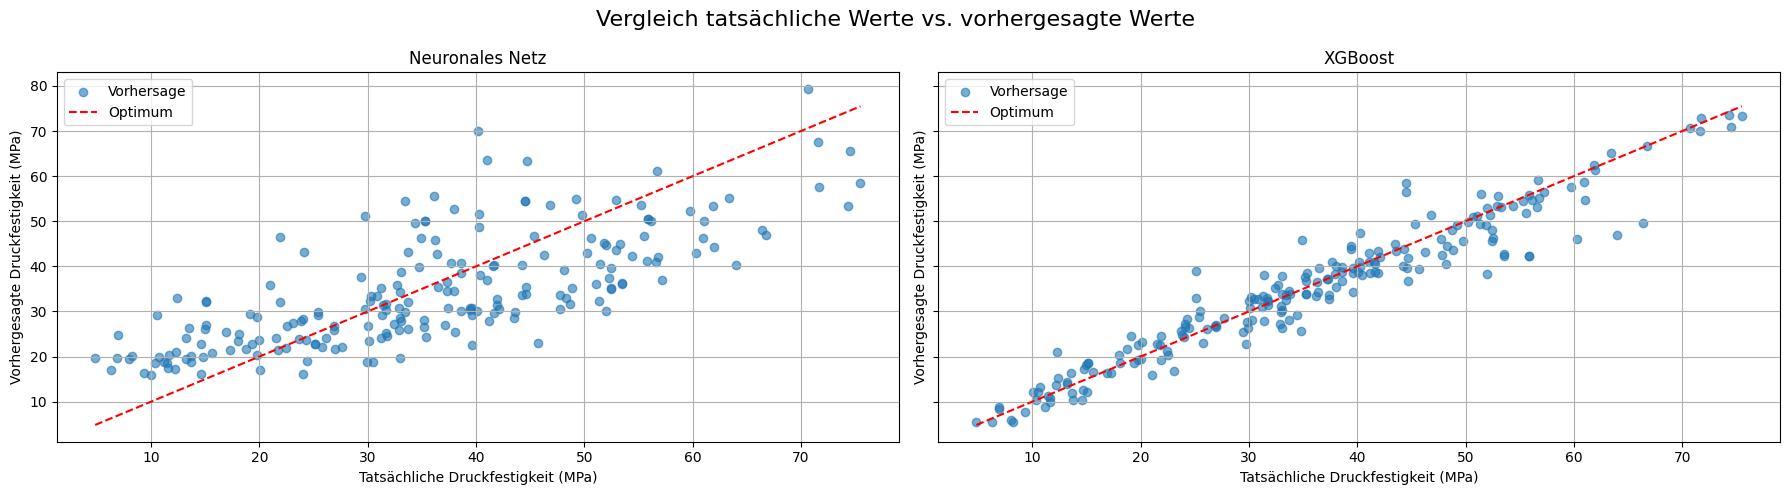

In [20]:
# Ergebnisse Modellen (tatsächliche Werte vs. Vorhergesagte Werte) plotten
fig, axs = plt.subplots(1, 2, figsize = (18, 5), sharey=True)
models = {
    'Neuronales Netz': y_pred_nn,
    'XGBoost': y_pred_xgb
}
for ax, (name, y_pred_model) in zip(axs, models.items()):
    ax.scatter(y_test, y_pred_model, alpha=0.6, label = "Vorhersage")
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label = "Optimum")
    ax.set_title(name)
    ax.set_xlabel("Tatsächliche Druckfestigkeit (MPa)")
    ax.set_ylabel("Vorhergesagte Druckfestigkeit (MPa)")
    ax.grid(True)
    ax.legend()
fig.suptitle("Vergleich tatsächliche Werte vs. vorhergesagte Werte", fontsize = 16)
plt.tight_layout()
plt.show()